# Data Loading

In [1]:
import pandas as pd

#  Load dataset

In [4]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Preprocessing

In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [6]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [7]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# import libeary

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

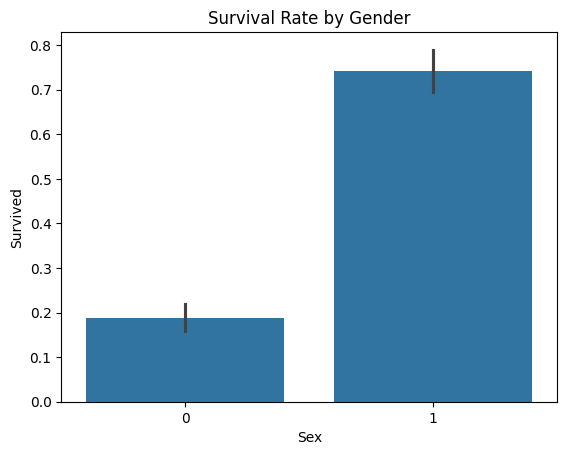

In [10]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

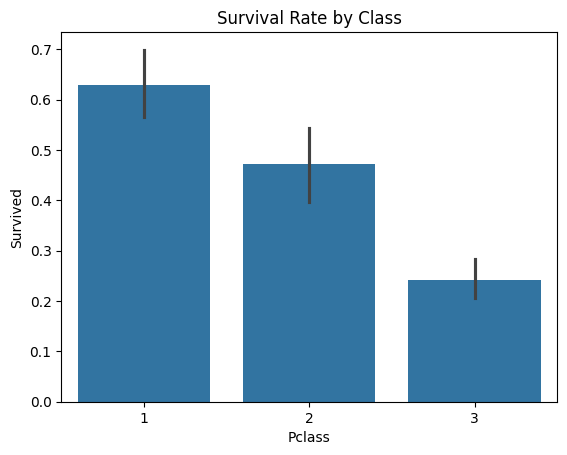

In [11]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()

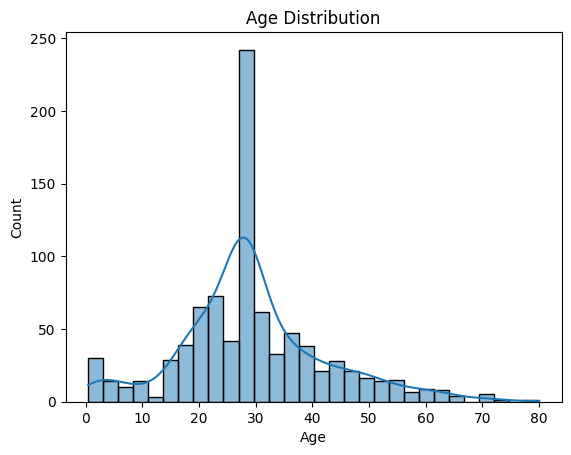

In [12]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

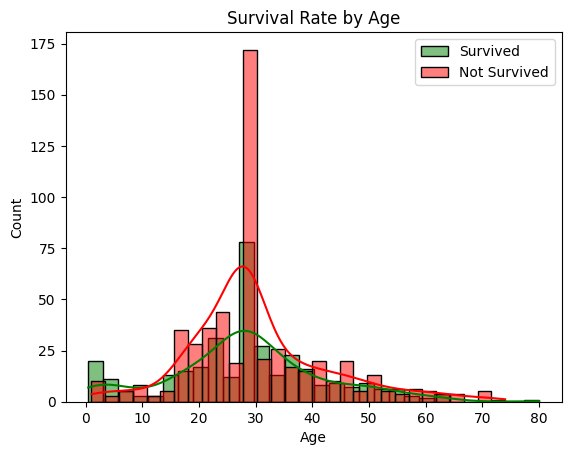

In [13]:
sns.histplot(data[data['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(data[data['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.show()

# Additional features

In [14]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
features.append('FamilySize')
X = data[features]


# Training model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predictions

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[91 14]
 [18 56]]


# Interpretation of Results

In [21]:
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

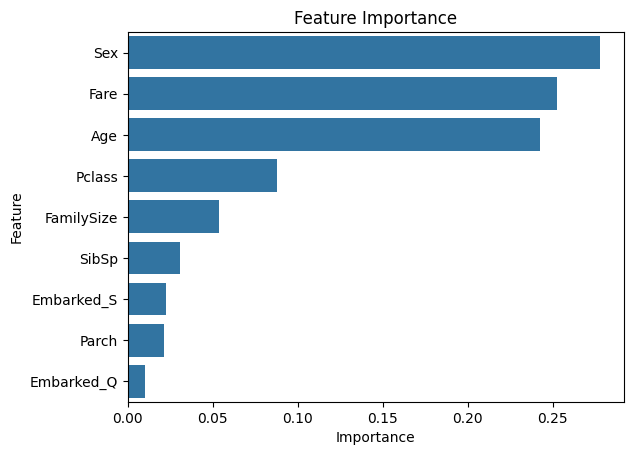

In [22]:
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()